In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import scipy.io as sio
import seaborn as sns

In [ ]:
#Function to calculate the Average of the list
def list_average(lst):
  return sum(lst)/len(lst)

In [ ]:
class LinearRegression:
    def __init__(self, batch_size=32, regularization=0, max_epochs=100, patience=3):

        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.weights = None
        self.bias = None


    def fit(self, X, y, batch_size=32, regularization=0, max_epochs=100, patience=3, learning_rate=0.0005):
        self.regularization = regularization
        self.batch_size = batch_size
        self.patience = patience
        self.max_epochs = max_epochs
        self.learning_rate = learning_rate

        # Here we are calculating the total samples that are there, total number of features, total number of outputs.
        total_records, total_features,outputs= X.shape[0], X.shape[1], y.shape[1]

        # Initialize the weights and bias based on the shape of X and y.
        self.weights = np.random.randint(0,1,size=(total_features,outputs)) * 0.01
        self.bias = np.random.randint(0,1,size=(1,outputs))
        weights = self.weights
        bias = self.bias
        L2 = self.regularization
        # Taking 90% of the data as train and 10% as test
        X_train, X_val, y_train,y_val = X[:int(0.9 * total_records)], X[int(0.9 * total_records):], y[:int(0.9 * total_records)], y[int(0.9 * total_records):]


        count_patience = 0
        step_count =0
        # Implement the training loop.
        MSEList= [100]
        Loss_overtime=[]
        for epoch in range(max_epochs):
          loss_per_epoch=[]

          for i in range(0,int(0.9 * total_records), batch_size):
            batch_x = X_train[i:i + batch_size]
            batch_y = y_train[i:i + batch_size]

            #Here we will have our predictions
            y_predicted = batch_x@(weights) + bias
            #L2 stands for the regularization coefficient, L_2 is the regularization term
            L_2= (L2/2*batch_size) * np.sum(np.square(weights))
            loss = np.mean((batch_y-y_predicted)**2) + L_2
            loss_per_epoch.append(loss)

            dw = (2/batch_size) * (batch_x.T)@(y_predicted-batch_y) + (L2 * weights)
            db = (2/batch_size) * np.sum(y_predicted-batch_y)


            weights = weights- learning_rate * dw
            bias = bias - learning_rate * db


          Loss_overtime.append(np.mean(loss_per_epoch))
          predictions = X_val@(weights) + bias


          MSE = np.mean((predictions-y_val)**2)
          if count_patience < self.patience:
              if MSE> MSEList[-1]:
                count_patience=count_patience+1
                MSEList.append(MSE)
              else:
                MSEList.append(MSE)
          else:
                MSEList.append(MSE)
                break

          step_count+=1

        self.weights = weights
        self.bias = bias
        self.averageloss = Loss_overtime
        MSEList.remove(100)
        self.MSEList = MSEList
        self.step_count = step_count
        self.MSE = list_average(MSEList)



    def predict(self, X):


        predictions = X @(self.weights) + self.bias
        return predictions

    def score(self, X, y):
        predictions = self.predict(X)
        mean_square_error = np.mean((predictions - y) ** 2)
        return mean_square_error



In [ ]:
# Loading the DataSet
original_iris_data= datasets.load_iris()



Model 1.1: Comparing the Sepal Length, Sepal Width and calculating the error, without regularisation

In [ ]:
lr_SL_SW = LinearRegression()
X_sepal_length = original_iris_data.data[:,[0]]
y_sepal_width = original_iris_data.data[:,[1]]
equal_split = original_iris_data.target
X_train_sl, X_test_sl, y_train_sw, y_test_sw = train_test_split(X_sepal_length, y_sepal_width, test_size=0.10, random_state=6601, stratify = equal_split)
lr_SL_SW.fit(X_train_sl, y_train_sw)

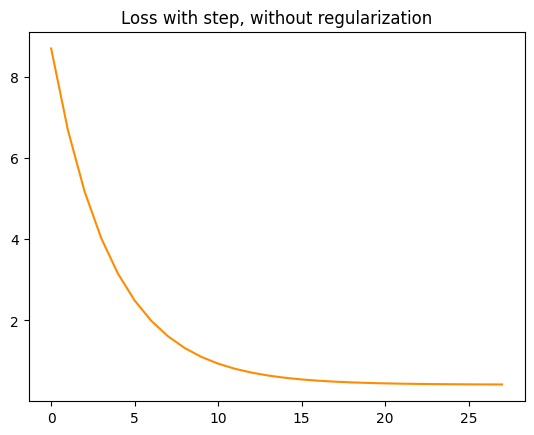

In [ ]:
plt.title('Loss with step, without regularization')
x11 = np.arange(len(lr_SL_SW.averageloss))
y11 = lr_SL_SW.averageloss
plt.plot(x11,y11, color = 'darkorange')
plt.show()

In [ ]:
print(lr_SL_SW.MSE)

1.1019213207657967


Model 1.2: Comparing the Sepal Length, Sepal Width and calculating the error, regularisation 0.1

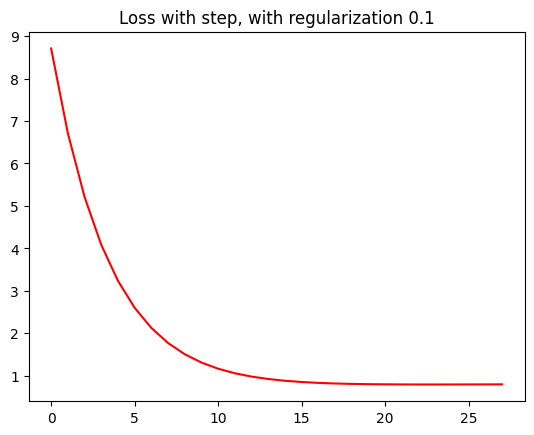

In [ ]:
lr_SLSWR1 = LinearRegression()
lr_SLSWR1.fit(X_train_sl, y_train_sw, regularization=0.1)
plt.title('Loss with step, with regularization 0.1')
x12 = np.arange(len(lr_SLSWR1.averageloss))
y12 = lr_SLSWR1.averageloss
plt.plot(x12,y12, color = 'red')
plt.show()

In [ ]:
print(lr_SLSWR1.MSE)

1.1029342641657203


Model 1.3: Comparing the Sepal Length, Sepal Width and calculating the error, with regularisation 0.3

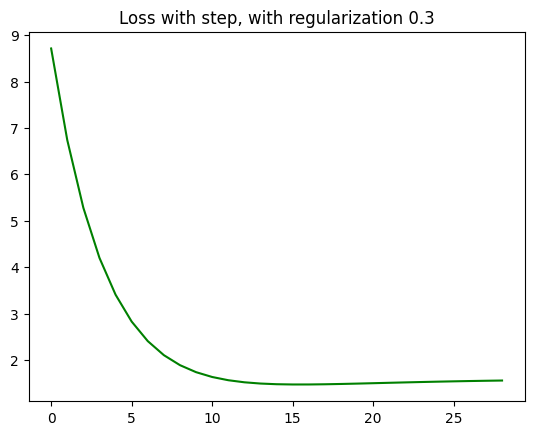

In [ ]:
lr_SLSWR2 = LinearRegression()
lr_SLSWR2.fit(X_train_sl, y_train_sw, regularization=0.3)
plt.title('Loss with step, with regularization 0.3')
x13 = np.arange(len(lr_SLSWR2.averageloss))
y13 = lr_SLSWR2.averageloss
plt.plot(x13,y13, color = 'green')
plt.show()

In [ ]:
print(lr_SLSWR2.MSE)

1.0755257715389177


Model 2.1: Comparing the Sepal Length, Petal Length and calculating the error, without regularisation

In [ ]:
lr_SL_PL = LinearRegression()
X_sepal_length = original_iris_data.data[:,[0]]
y_petal_length = original_iris_data.data[:,[2]]
equal_split = original_iris_data.target
X_train_sl, X_test_sl, y_train_pl, y_test_pl = train_test_split(X_sepal_length, y_petal_length, test_size=0.10, random_state=6601, stratify = equal_split)
lr_SL_PL.fit(X_train_sl, y_train_pl)

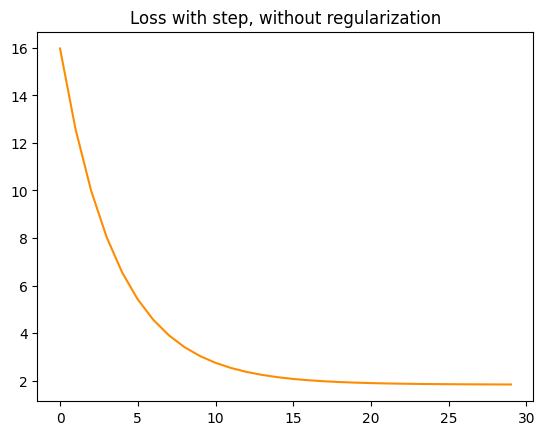

In [ ]:
plt.title('Loss with step, without regularization')
x21 = np.arange(len(lr_SL_PL.averageloss))
y21 = lr_SL_PL.averageloss
plt.plot(x21,y21, color = 'darkorange')
plt.show()

In [ ]:
print(lr_SL_PL.MSE)

2.4331219876731662


Model 2.2: Comparing the Sepal Length, Petal Length and calculating the error, regularisation 0.1

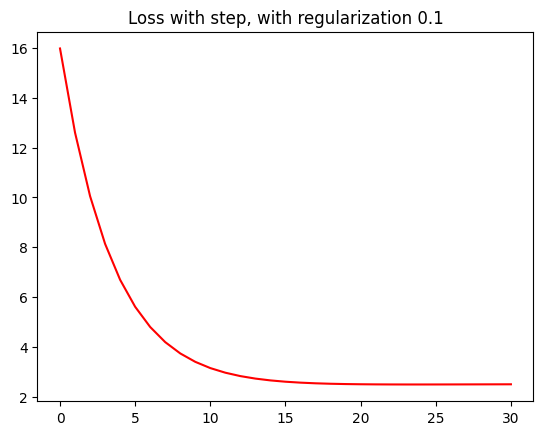

In [ ]:
lr_SLPL1 = LinearRegression()
lr_SLPL1.fit(X_train_sl, y_train_pl, regularization=0.1)
plt.title('Loss with step, with regularization 0.1')
x22= np.arange(len(lr_SLPL1.averageloss))
y22 = lr_SLPL1.averageloss
plt.plot(x22,y22, color = 'red')
plt.show()

In [ ]:
print(lr_SLPL1.MSE)

2.3900513730532738


Model 2.3: Comparing the Sepal Length, Petal Length and calculating the error, with regularisation 0.3

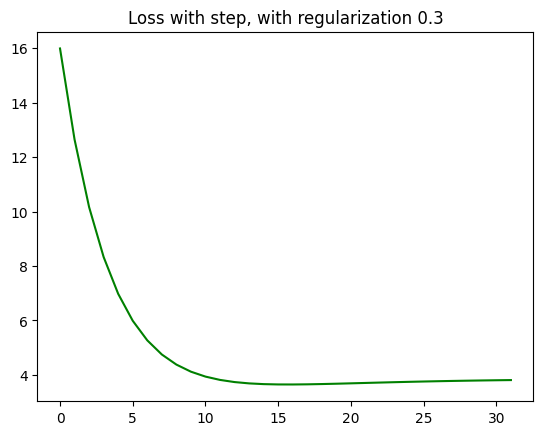

In [ ]:
lr_SLPL3 = LinearRegression()
lr_SLPL3.fit(X_train_sl, y_train_pl, regularization=0.3)
plt.title('Loss with step, with regularization 0.3')
x23 = np.arange(len(lr_SLPL3.averageloss))
y23 = lr_SLPL3.averageloss
plt.plot(x23,y23, color = 'green')
plt.show()

In [ ]:
print(lr_SLPL3.MSE)

2.351392385916603


Model 3.1: Comparing the Sepal Length, Petal Width and calculating the error, without regularisation

In [ ]:
lr_SL_PW = LinearRegression()
X_sepal_length = original_iris_data.data[:,[0]]
y_petal_width = original_iris_data.data[:,[3]]
equal_split = original_iris_data.target
X_train_sl, X_test_sl, y_train_pw, y_test_pw = train_test_split(X_sepal_length, y_petal_width, test_size=0.10, random_state=23, stratify = equal_split)
lr_SL_PW.fit(X_train_sl, y_train_pw)

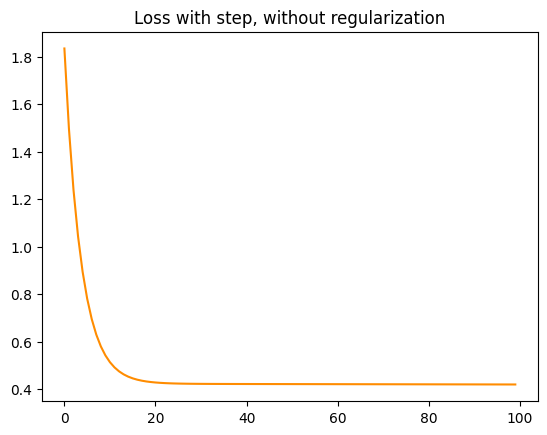

In [ ]:
plt.title('Loss with step, without regularization')
x31 = np.arange(len(lr_SL_PW.averageloss))
y31 = lr_SL_PW.averageloss
plt.plot(x31,y31, color = 'darkorange')
plt.show()

In [ ]:
print(lr_SL_PW.MSE)

0.2555924649301795


Model 3.2: Comparing the Sepal Length, Petal Width and calculating the error, regularisation 0.1

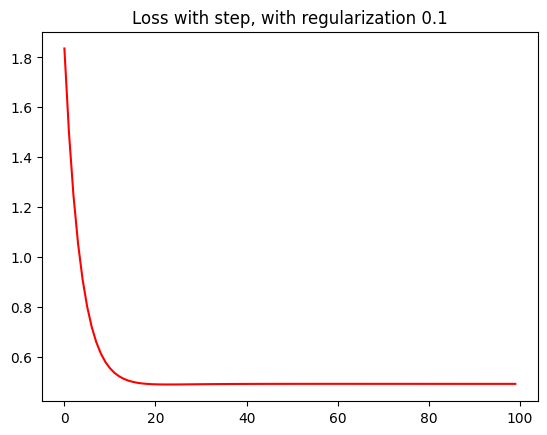

In [ ]:
lr_SLPW1 = LinearRegression()
lr_SLPW1.fit(X_train_sl, y_train_pw, regularization=0.1)
plt.title('Loss with step, with regularization 0.1')
x32 = np.arange(len(lr_SLPW1.averageloss))
y32 = lr_SLPW1.averageloss
plt.plot(x32,y32, color = 'red')
plt.show()

In [ ]:
print(lr_SLPW1.MSE)

0.2561885431133783


Model 3.3: Comparing the Sepal Length, Petal Width and calculating the error, with regularisation 0.3

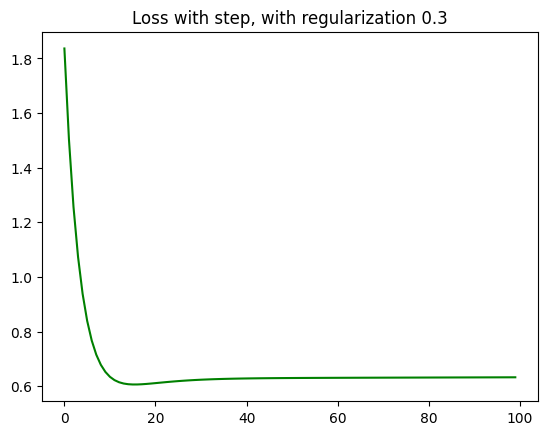

In [ ]:
lr_SLPW3 = LinearRegression()
lr_SLPW3.fit(X_train_sl, y_train_pw, regularization=0.3)
plt.title('Loss with step, with regularization 0.3')
x33 = np.arange(len(lr_SLPW3.averageloss))
y33 = lr_SLPW3.averageloss
plt.plot(x33,y33, color = 'green')
plt.show()

In [ ]:
print(lr_SLPL3.MSE)

2.351392385916603
